In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [53]:
df = pd.read_csv("PCardTransactions15-16.csv")

In [54]:
df['category'] = ""

In [55]:
df.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,category
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2,
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97,
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65,
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72,
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7,


In [72]:
#Expenses: 0 ; Revenue: 1; Others:2
def classify_transaction(row):
    description = row['Account Description']
    if "Expenses" in  description:
        return 0
    elif "Purchases" in description:
        return 1
    elif "Purcha" in description:
        return 1
    elif "Services" in description:
        return 1
    elif "Costs" in description: 
        return 0
    else:
        return 2

In [73]:
df = df.dropna(subset=['Account Description'])

In [74]:
df['category'] = df.apply(classify_transaction, axis=1)

In [75]:
df['category'].value_counts()

0    1464
2    1283
1    1117
Name: category, dtype: int64

In [61]:
df_with_dummy = pd.get_dummies(df['Service Area'])

In [62]:
df.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,category
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2,Expenses
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97,Expenses
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65,Others
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72,Revenue
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7,Others


In [77]:
result = pd.concat([df, df_with_dummy], axis=1, sort=False)

In [78]:
result.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total,category,Adults and Communities,Assurance,Children's Education & Skills,Children's Family Services,Children's Service DSG,Commissioning,Customer Support Group,Parking & Infrastructure,Regional Enterprise,Streetscene
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2,0,0,1,0,0,0,0,0,0,0,0
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97,0,0,0,0,1,0,0,0,0,0,0
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65,2,0,0,0,1,0,0,0,0,0,0
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72,1,0,0,0,1,0,0,0,0,0,0
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7,2,0,0,0,1,0,0,0,0,0,0


In [81]:
df_account_desc_dummies = pd.get_dummies(df['Account Description'])

In [83]:
df_final = pd.concat([df_account_desc_dummies, result], axis=1, sort=False)

In [86]:
df_final = df_final.drop(columns=['Service Area', 'Account Description', 'Creditor', 'Journal Date', 'Journal Reference', 'Total'])

In [89]:
X = df_final.drop(columns=['category'])

In [90]:
y = df_final['category']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [101]:
# Fitting classifier to the Training set
classifier = LogisticRegression()
classifier.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
y_pred = classifier.predict(X_test_std)

In [103]:
classifier.score(X_test_std, y_test)

0.9979296066252588

In [120]:
obj = df['Service Area'].value_counts()

In [124]:
x_axis = list(obj.keys())

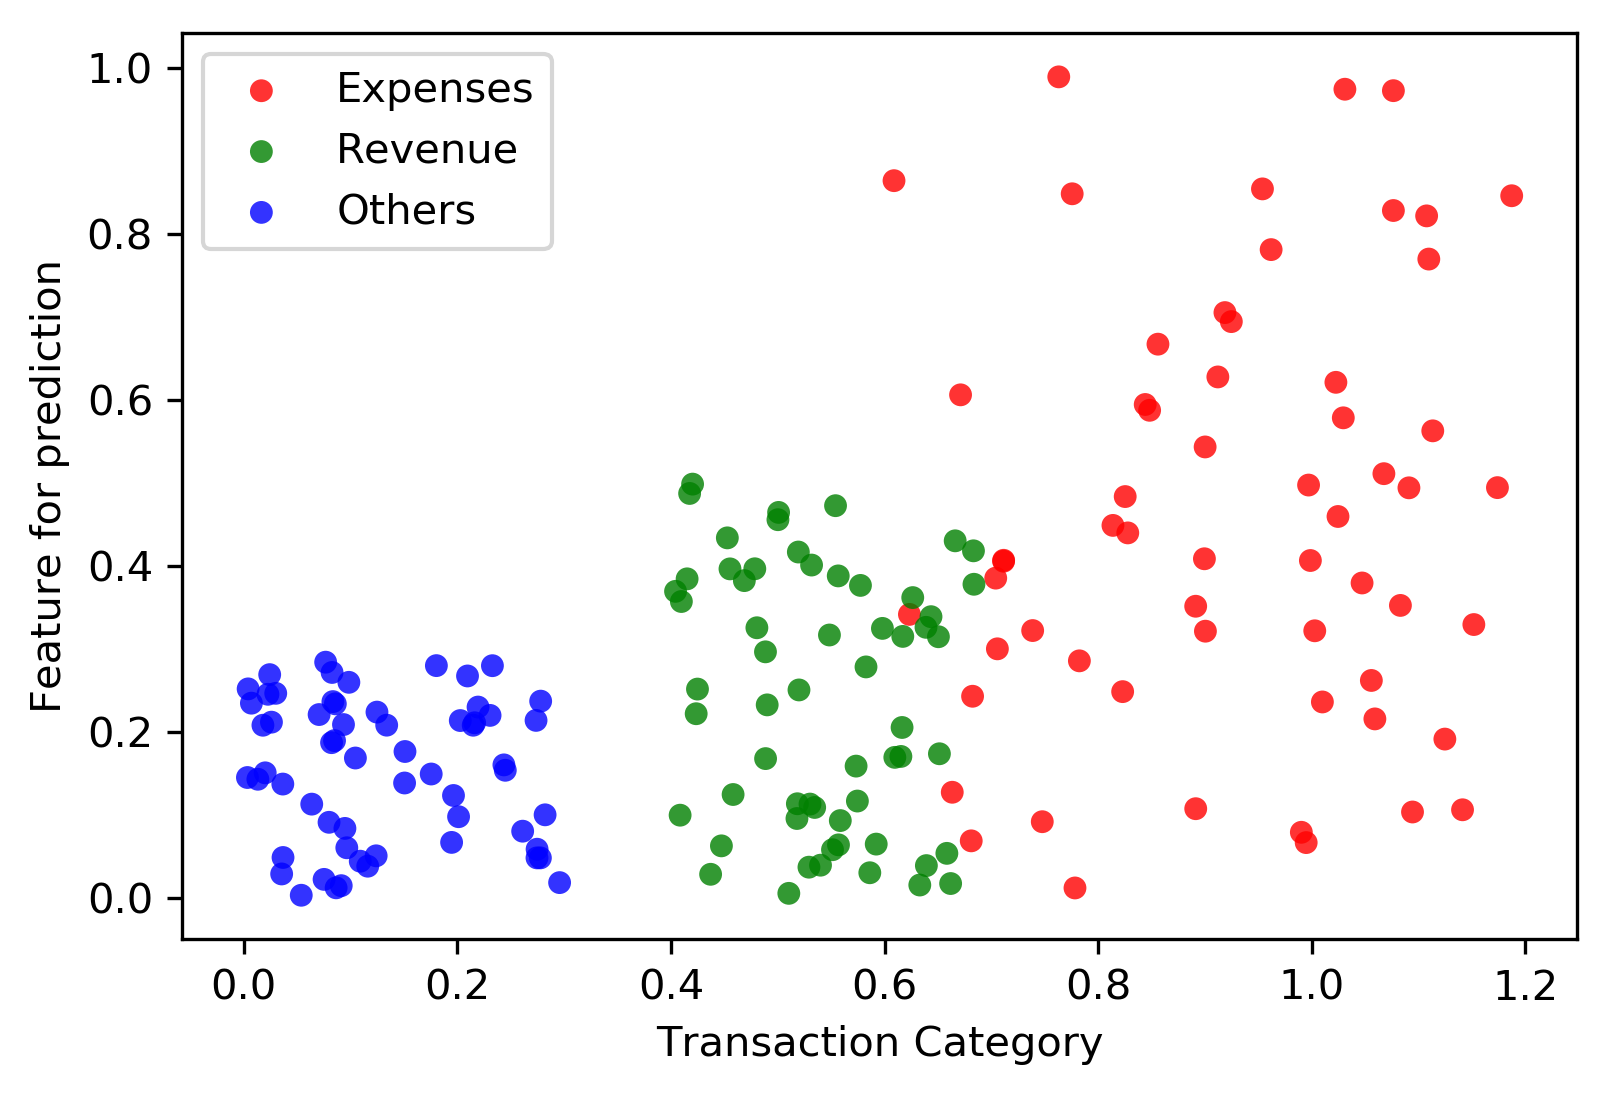

In [137]:
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Expenses", "Revenue", "Others")
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x,y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.legend(loc=2)
plt.xlabel("Transaction Category")
plt.ylabel("Feature for prediction")
plt.show()